## Train neural network on MNIST (and checkpoint)

https://www.tensorflow.org/datasets/keras_example

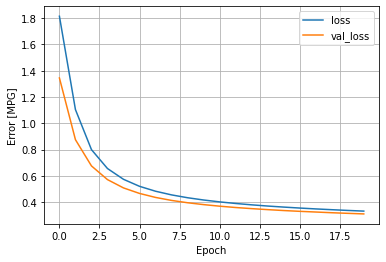

In [1]:
# Get train and test data
from data import mnist_data
trainX, trainY, _, _ = mnist_data()

# Train and checkpoint
from model import train_mnist, plot_loss
model, history = train_mnist(trainX, trainY)
plot_loss(history)